In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
import pickle

from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
df = pd.read_csv("Steel_industry_data.csv")
df.head(8)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   
5  01/01/2018 01:30       3.28                                  3.56   
6  01/01/2018 01:45       3.60                                  4.14   
7  01/01/2018 02:00       3.60                                  4.28   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   
5                                   0.0        0.0   
6                                   0.0        0.0   
7                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   
5                         67.76                         100.0  5400   
6                         65.62                         100.0  6300   
7                         64.37                         100.0  7200   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load  
5    Weekday      Monday  Light_Load  
6    Weekday      Monday  Light_Load  
7    Weekday      Monday  Light_Load

In [7]:
df['Usage_kWh'].value_counts()

Usage_kWh
3.06      631
2.95      609
2.92      598
3.02      560
2.88      556
         ... 
130.21      1
19.33       1
23.83       1
12.78       1
45.00       1
Name: count, Length: 3343, dtype: int64

In [8]:
df['Usage_kWh'].max()

157.18

In [9]:
df['Usage_kWh'].min()

0.0

In [10]:
df['Usage_kWh'].mean()

27.386892408675795

In [11]:
df['Usage_kWh'].std()

33.44437970801513

In [12]:
# Jaetaan data categorioihin
data = []

for data_point in df['Usage_kWh']:
    if data_point < 10:
        data.append("< 10")
    
    elif data_point > 10 and data_point < 20:
        data.append("> 10 & < 20")
        
    elif data_point > 20 and data_point < 30:
        data.append("> 20 & < 30")
        
    elif data_point > 30 and data_point < 40:
        data.append("> 30 & < 40")
        
    elif data_point > 40 and data_point < 50:
        data.append("> 40 & < 50")
        
    elif data_point > 50 and data_point < 60:
        data.append("> 50 & < 60")
        
    elif data_point > 60 and data_point < 70:
        data.append("> 60 & < 70")
        
    elif data_point > 70 and data_point < 80:
        data.append("> 70 & < 80")
        
    elif data_point > 80 and data_point < 90:
        data.append("> 80 & < 90")
        
    elif data_point > 90 and data_point < 100:
        data.append("> 90 & < 100")
        
    elif data_point > 100 and data_point < 110:
        data.append("> 100 & < 110")
        
    elif data_point > 110 and data_point < 120:
        data.append("> 110 & < 120")
        
    elif data_point > 120 and data_point < 130:
        data.append("> 120 & < 130")
        
    elif data_point > 130 and data_point < 140:
        data.append("> 130 & < 140")
        
    elif data_point > 140 and data_point < 150:
        data.append("> 140 & < 150")
        
    else:  # data_point > 150
        data.append("> 150")

data_array = np.array(data)
data_array

array(['< 10', '< 10', '< 10', ..., '< 10', '< 10', '< 10'], dtype='<U13')

In [13]:
df['Usage_kWh_categorical'] = data_array
df.head(4)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   

  WeekStatus Day_of_week   Load_Type Usage_kWh_categorical  
0    Weekday      Monday  Light_Load                  < 10  
1    Weekday      Monday  Light_Load                  < 10  
2    Weekday      Monday  Light_Load                  < 10  
3    Weekday      Monday  Light_Load                  < 10

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
 11  Usage_kWh_categ

In [15]:
 df.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh_categorical                   0
dtype: int64

In [16]:
label_encoder = LabelEncoder()
df_copy = df.copy()
df_copy["WeekStatus"] = label_encoder.fit_transform(df["WeekStatus"])
df_copy["Day_of_week"] = label_encoder.fit_transform(df["Day_of_week"])
df_copy["Load_Type"] = label_encoder.fit_transform(df["Load_Type"])

df_copy["Usage_kWh_categorical"] = label_encoder.fit_transform(df["Usage_kWh_categorical"])

df_copy = df_copy.drop(columns=['date', 'Usage_kWh'])

df_copy.head(4)

Lagging_Current_Reactive.Power_kVarh  Leading_Current_Reactive_Power_kVarh  \
0                                  2.95                                   0.0   
1                                  4.46                                   0.0   
2                                  3.28                                   0.0   
3                                  3.56                                   0.0   

   CO2(tCO2)  Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
0        0.0                         73.21                         100.0   
1        0.0                         66.77                         100.0   
2        0.0                         70.28                         100.0   
3        0.0                         68.09                         100.0   

    NSM  WeekStatus  Day_of_week  Load_Type  Usage_kWh_categorical  
0   900           0            1          0                      0  
1  1800           0            1          0                      0  
2  2700           0            1          0                      0  
3  3600           0            1          0                      0

In [17]:
df_copy = df_copy.sort_values(by=['Usage_kWh_categorical'])
df_copy

Lagging_Current_Reactive.Power_kVarh  \
0                                      2.95   
20723                                  0.00   
20722                                  0.00   
20721                                  0.00   
20720                                  0.00   
...                                     ...   
11690                                 33.12   
446                                   38.09   
11692                                 34.02   
29532                                 26.28   
16185                                 28.51   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00       0.00   
20723                                 16.74       0.00   
20722                                 16.85       0.00   
20721                                 16.92       0.00   
20720                                 17.10       0.00   
...                                     ...        ...   
11690                                  0.00       0.04   
446                                    0.00       0.04   
11692                                  0.00       0.05   
29532                                  0.00       0.04   
16185                                  0.00       0.04   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
20723                        100.00                         17.36  75600   
20722                        100.00                         17.47  74700   
20721                        100.00                         17.01  73800   
20720                        100.00                         18.23  72900   
...                             ...                           ...    ...   
11690                         94.19                        100.00  67500   
446                           92.53                        100.00  56700   
11692                         94.57                        100.00  69300   
29532                         96.28                        100.00  54900   
16185                         95.73                        100.00  52200   

       WeekStatus  Day_of_week  Load_Type  Usage_kWh_categorical  
0               0            1          0                      0  
20723           1            2          0                      0  
20722           1            2          0                      0  
20721           1            2          0                      0  
20720           1            2          0                      0  
...           ...          ...        ...                    ...  
11690           0            6          2                     15  
446             0            0          2                     15  
11692           0            6          2                     15  
29532           1            3          2                     15  
16185           0            1          1                     15  

[35040 rows x 10 columns]

In [18]:
classes = label_encoder.classes_
classes

array(['< 10', '> 10 & < 20', '> 100 & < 110', '> 110 & < 120',
       '> 120 & < 130', '> 130 & < 140', '> 140 & < 150', '> 150',
       '> 20 & < 30', '> 30 & < 40', '> 40 & < 50', '> 50 & < 60',
       '> 60 & < 70', '> 70 & < 80', '> 80 & < 90', '> 90 & < 100'],
      dtype=object)

In [19]:
len(classes)

16

In [20]:
X = df_copy.drop(columns=['Usage_kWh_categorical'])
Y = df_copy['Usage_kWh_categorical']

In [21]:
# Erottellaan oppimista varten train-data
X_train_data_temp, X_test, Y_train_data_temp, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Validointi-dataa vielä erilleen
X_train, X_val, Y_train, Y_val = train_test_split(X_train_data_temp, Y_train_data_temp, test_size=0.20, random_state=0)

In [22]:
X_train.shape

(21024, 9)

In [23]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.fit_transform(X_val)
X_test_scaled = sc.fit_transform(X_test)

In [24]:
# Luodaan neuroverkko
model = Sequential()

input_shape = (X_train.shape[-1], )
output_units = 16  # Valitaan mahdollisten luokkien lukumäärä 16

model.add(Dense(units=128, activation='relu', input_shape=input_shape))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=output_units, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
Total params: 19856 (77.56 KB)
Trainable params: 19856 (77.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
X_val_categorial = to_categorical(X_val_scaled, dtype="uint8")
Y_test_categorial = to_categorical(Y_test, dtype="uint8")

In [26]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_scaled, y=Y_train, validation_data=(X_val_scaled, Y_val), epochs=100, verbose=2, shuffle=True)

Epoch 1/100
657/657 - 2s - loss: 0.7588 - accuracy: 0.7311 - val_loss: 0.5094 - val_accuracy: 0.7981 - 2s/epoch - 3ms/step
Epoch 2/100
657/657 - 1s - loss: 0.4951 - accuracy: 0.7958 - val_loss: 0.4251 - val_accuracy: 0.8253 - 1s/epoch - 2ms/step
Epoch 3/100
657/657 - 1s - loss: 0.4244 - accuracy: 0.8232 - val_loss: 0.3629 - val_accuracy: 0.8512 - 1s/epoch - 2ms/step
Epoch 4/100
657/657 - 1s - loss: 0.3696 - accuracy: 0.8467 - val_loss: 0.3215 - val_accuracy: 0.8701 - 1s/epoch - 2ms/step
Epoch 5/100
657/657 - 1s - loss: 0.3318 - accuracy: 0.8597 - val_loss: 0.2930 - val_accuracy: 0.8754 - 1s/epoch - 2ms/step
Epoch 6/100
657/657 - 1s - loss: 0.3036 - accuracy: 0.8739 - val_loss: 0.2543 - val_accuracy: 0.8986 - 1s/epoch - 2ms/step
Epoch 7/100
657/657 - 1s - loss: 0.2790 - accuracy: 0.8831 - val_loss: 0.2484 - val_accuracy: 0.8917 - 1s/epoch - 2ms/step
Epoch 8/100
657/657 - 1s - loss: 0.2626 - accuracy: 0.8879 - val_loss: 0.2338 - val_accuracy: 0.9058 - 1s/epoch - 2ms/step
Epoch 9/100
657/

In [ ]:
with open("model.pickle", "wb") as file:
    pickle.dump(model, file)

In [27]:
with open("model.pickle", "rb") as file:
    model = pickle.load(file)

In [28]:
predictions = np.argmax(model.predict(X_test_scaled), axis=1)
predictions[:5]

274/274 [==============================] - 0s 1ms/step


array([ 0, 15,  3,  0, 13], dtype=int64)

In [29]:
# Lasketaan tarkkuus
accuracy_score(Y_test, predictions)

0.9194063926940639

Text(295.72222222222223, 0.5, 'Actual')

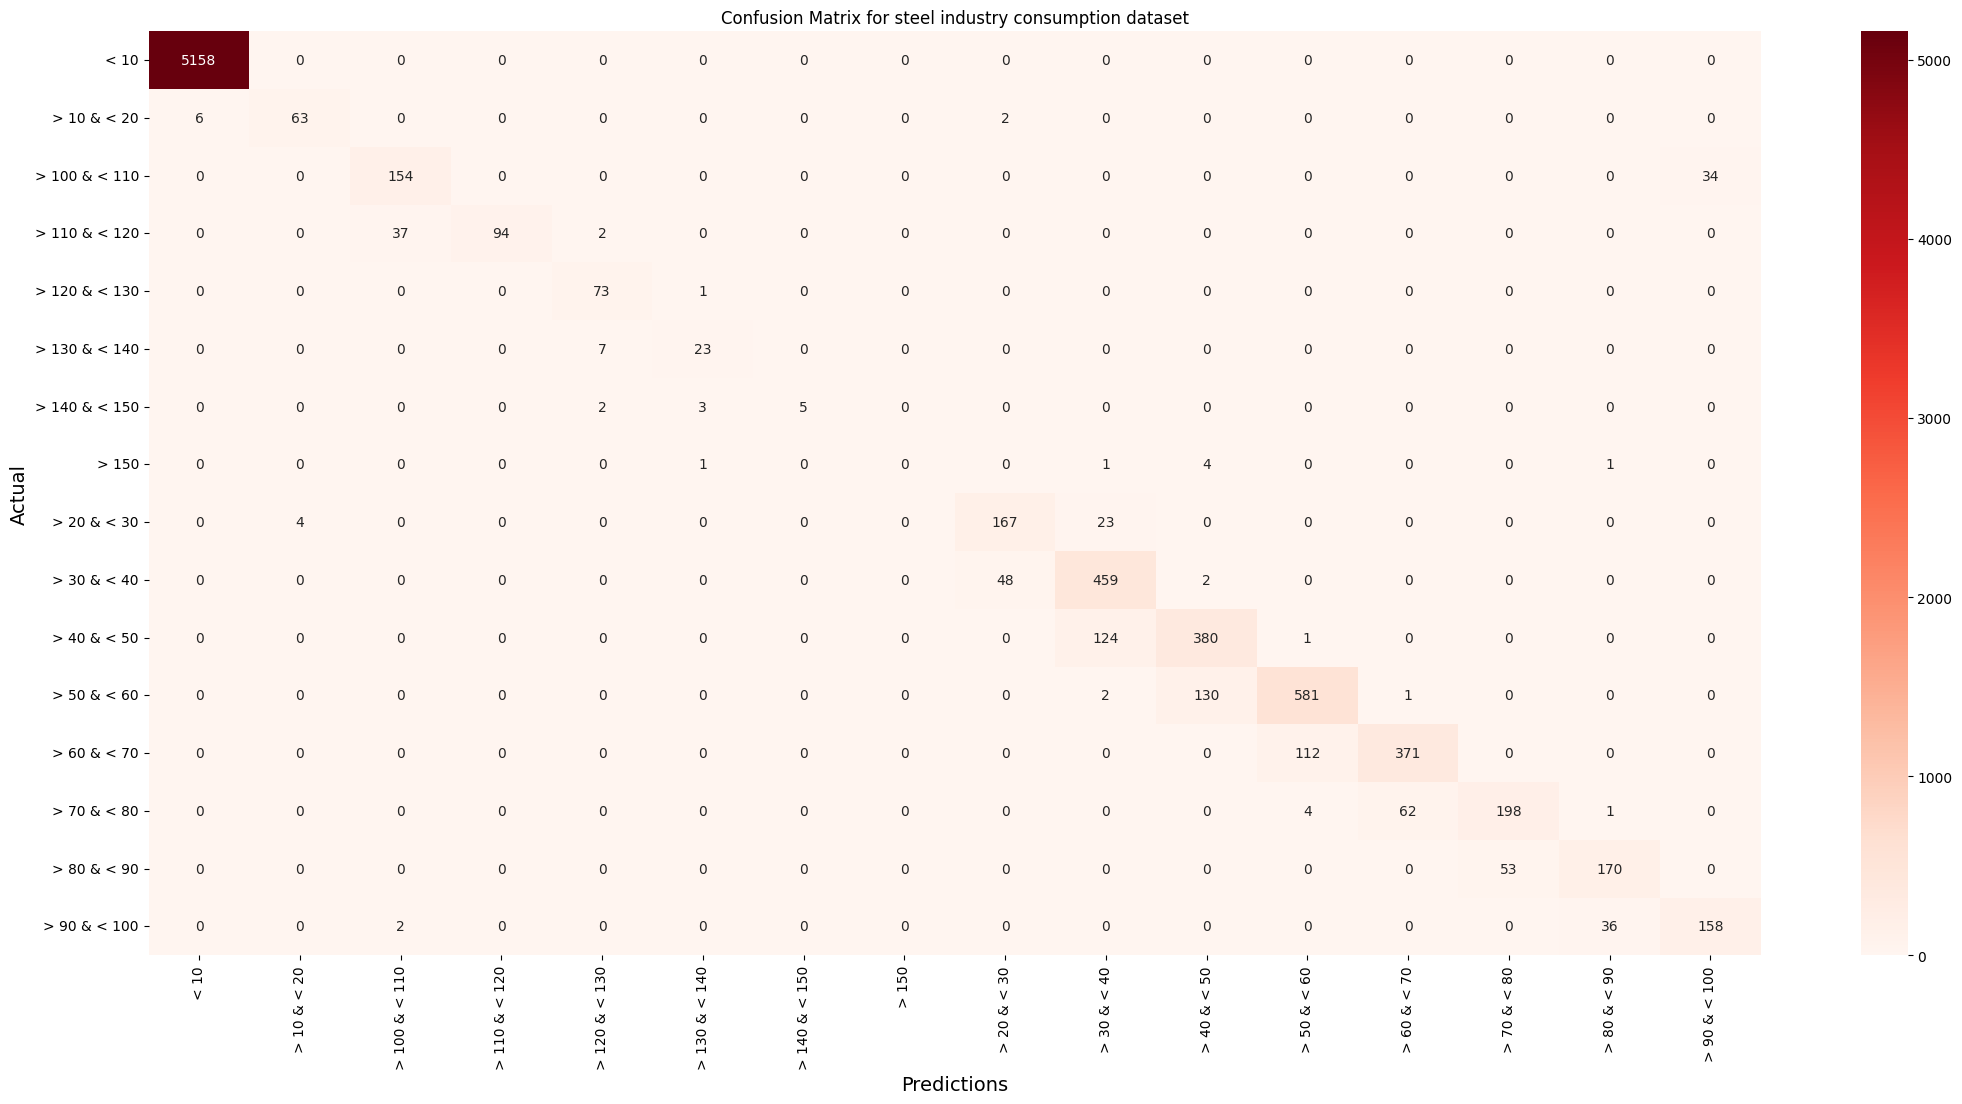

In [32]:
cm = confusion_matrix(Y_test_categorial.argmax(axis=1), predictions)

plt.figure(figsize=(26, 12))

ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Reds',
    # Käytetään aiemmin tallennettua classes-listaa
    xticklabels=classes,
    yticklabels=classes,
)
ax.set_title("Confusion Matrix for steel industry consumption dataset")
ax.set_xlabel("Predictions", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)